In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [47]:
df = pd.read_csv("train.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [48]:
df.shape

(381109, 12)

In [49]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  str    
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  str    
 7   Vehicle_Damage        381109 non-null  str    
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), str(3)
memory usage: 34.9 MB


In [50]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**The dataset contains 381,109 observations and 12 features. There are no missing values present. The dataset includes numerical, categorical, and binary features, making it suitable for feature engineering.**

In [51]:
df.drop('id',axis=1,inplace=True)

**The id column is removed as it does not contain predictive information.**

In [52]:
df.duplicated().sum()

np.int64(269)

In [53]:
df = df.drop_duplicates()

In [54]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


**Duplicate records were identified and removed to ensure that the model does not learn biased patterns from repeated observations.**

### Exploratory Data Analysis
EDA helps in understanding the important features and their contribution

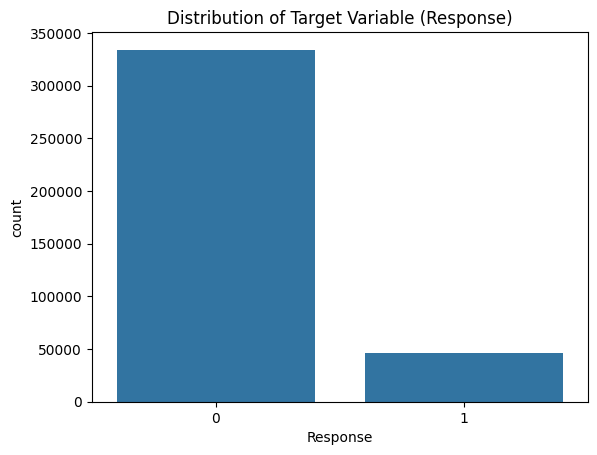

In [55]:
df['Response'].value_counts(normalize=True)*100
sns.countplot(x='Response',data = df)
plt.title("Distribution of Target Variable (Response)")
plt.show()

**The dataset is highly imbalanced, with a significantly larger proportion of non-responders compared to responders. Therefore, evaluation metrics such as F1-score and ROC-AUC will be more appropriate than accuracy.**

In [56]:
# Summary statistics
df[['Age', 'Annual_Premium', 'Vintage']].describe()

,Age,Annual_Premium,Vintage
count,380840.000000,380840.000000,380840.000000
mean,38.823593,30584.016078,154.344607
std,15.513206,17203.258664,83.670240
min,20.000000,2630.000000,10.000000
25%,25.000000,24426.000000,82.000000
50%,36.000000,31678.500000,154.000000
75%,49.000000,39408.000000,227.000000
max,85.000000,540165.000000,299.000000


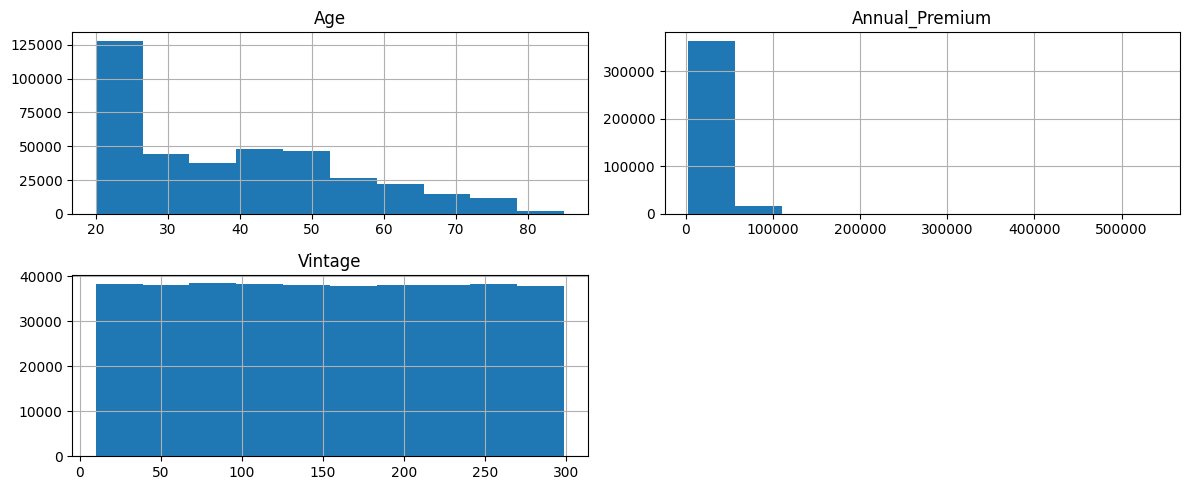

In [57]:
# Histograms
df[['Age', 'Annual_Premium', 'Vintage']].hist(figsize=(12,5))
plt.tight_layout()
plt.show()

**Summary statistics help understand the distribution and spread of numerical variables such as Age, Annual_Premium, and Vintage.**

In [58]:
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage',
                    'Previously_Insured', 'Driving_License']

for col in categorical_cols:
    print("\n", col)
    print(df[col].value_counts(normalize=True)*100)



 Gender
Gender
Male      54.074677
Female    45.925323
Name: proportion, dtype: float64

 Vehicle_Age
Vehicle_Age
1-2 Year     52.559343
< 1 Year     43.238893
> 2 Years     4.201765
Name: proportion, dtype: float64

 Vehicle_Damage
Vehicle_Damage
Yes    50.487606
No     49.512394
Name: proportion, dtype: float64

 Previously_Insured
Previously_Insured
0    54.179183
1    45.820817
Name: proportion, dtype: float64

 Driving_License
Driving_License
1    99.786787
0     0.213213
Name: proportion, dtype: float64


<Axes: xlabel='Vehicle_Damage', ylabel='Response'>

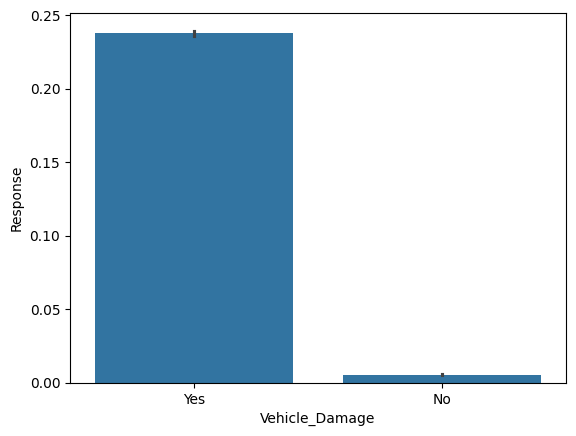

In [59]:
sns.barplot(x='Vehicle_Damage', y='Response', data=df)

**Customers whose vehicles were previously damaged show a significantly higher response rate (23.7%) compared to those without prior damage (0.5%). This indicates that Vehicle_Damage is a strong predictor of insurance purchase behavior and will likely play an important role in model performance.**

<Axes: xlabel='Vehicle_Age', ylabel='Response'>

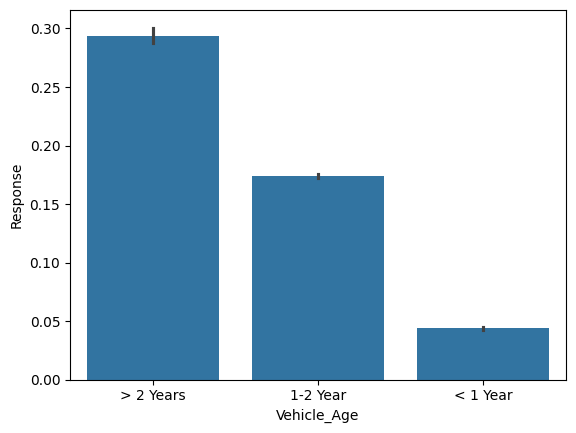

In [60]:
sns.barplot(x='Vehicle_Age', y='Response', data=df)

**Customers with more than 2 yrs of vehicle age have the most probabilty of buying a insurance compared to with vehicle age 1-2 years and least being less than 1 year**

<Axes: xlabel='Gender', ylabel='Response'>

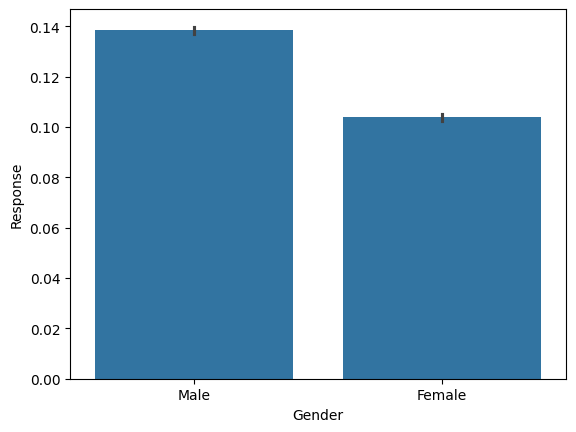

In [61]:
sns.barplot(x='Gender', y='Response', data=df)

**Gender has no such impact on the response.**

<Axes: xlabel='Vehicle_Damage', ylabel='Response'>

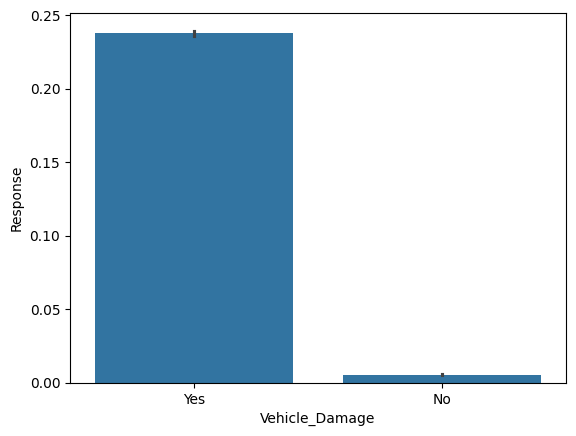

In [62]:
sns.barplot(x='Vehicle_Damage', y='Response', data=df)

**Previously_Insured is a highly predictive feature, as customers who are already insured show near-zero probability of purchasing the policy again. This feature captures strong behavioral intent and is expected to significantly influence model performance.**

**Encoding categorical column**

In [63]:
# Identify categorical columns
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

**Dropping column Region Code and Policy_sales_Channel as they do not have any impact**

In [64]:
df_encoded = df_encoded.drop(columns=['Region_Code', 'Policy_Sales_Channel'])
X = df_encoded.drop('Response', axis=1)
y = df_encoded['Response']

### Training Model before feature engineering

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))


### Performing Feature Engineering

In [ ]:
df_new = pd.read_csv("train.csv")
df_new.head()

In [ ]:
X = df_new.drop(columns=['id', 'Response'])
y = df_new['Response']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Target Encoding for Region Code and Policy_sales_channel

In [ ]:
# Calculating mean response per region 
region_means = y_train.groupby(X_train['Region_Code']).mean()

# Map to train and test
X_train['Region_TE'] = X_train['Region_Code'].map(region_means)
X_test['Region_TE'] = X_test['Region_Code'].map(region_means)

X_test['Region_TE'] = X_test['Region_TE'].fillna(y_train.mean())

In [ ]:
channel_means = y_train.groupby(X_train['Policy_Sales_Channel']).mean()

X_train['Channel_TE'] = X_train['Policy_Sales_Channel'].map(channel_means)
X_test['Channel_TE'] = X_test['Policy_Sales_Channel'].map(channel_means)

X_test['Channel_TE'] = X_test['Channel_TE'].fillna(y_train.mean())

In [ ]:
X_train.drop(columns=['Region_Code', 'Policy_Sales_Channel'], inplace=True)
X_test.drop(columns=['Region_Code', 'Policy_Sales_Channel'], inplace=True)

**High-cardinality categorical features were encoded using target encoding.Each category was replaced with its average response rate calculated from the training data to avoid data leakage.**

### Grouping age into 4 categories

In [ ]:
bins = [0, 25, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle_Aged', 'Senior']

X_train['Age_Group'] = pd.cut(X_train['Age'], bins=bins, labels=labels)
X_test['Age_Group'] = pd.cut(X_test['Age'], bins=bins, labels=labels)

In [ ]:
# One-hot encode age groups
X_train = pd.get_dummies(X_train, columns=['Age_Group'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Age_Group'], drop_first=True)

**Age may have a non-linear relationship with insurance purchase behavior. Logistic Regression assumes linearity, so we discretize age into meaningful groups. This allows the model to capture step-wise behavioral differences across age segments.**

### Premium Per Age - Because Premium effect depends on Age.

In [ ]:
X_train['Premium_per_Age'] = X_train['Annual_Premium'] / X_train['Age']
X_test['Premium_per_Age'] = X_test['Annual_Premium'] / X_test['Age']

**The raw annual premium does not capture its relative significance across age groups. To incorporate contextual information, a new feature Premium_per_Age was created by dividing annual premium by age. This interaction feature allows the model to capture relative premium intensity and improves the linear separability of classes.**

### Previously_Insured × Vehicle_Damage

In [ ]:
# Convert Vehicle_Damage to binary
X_train['Vehicle_Damage'] = X_train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
X_test['Vehicle_Damage'] = X_test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

In [ ]:
X_train['Insured_Damage_Interaction'] = (
    X_train['Previously_Insured'] * X_train['Vehicle_Damage']
)

X_test['Insured_Damage_Interaction'] = (
    X_test['Previously_Insured'] * X_test['Vehicle_Damage']
)

**Logistic Regression cannot automatically capture interactions between features. From EDA, we observed that both Previously_Insured and Vehicle_Damage strongly influence customer response.To capture their combined effect, we created an interaction feature by multiplying the two variables. This allows the model to account for scenarios where insurance history and vehicle damage status together influence purchasing behavior.This engineered feature helps the linear model better represent real-world decision patterns.**

### Encoding the remaining columns

In [ ]:
# One-hot encode remaining categorical columns
categorical_cols = ['Gender', 'Vehicle_Age']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

In [ ]:
# Align train and test columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

### Using Standard Scaler to scale the numeric values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Identify numeric columns (exclude binary dummy columns if desired)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Re-Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_model_fe = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model_fe.fit(X_train, y_train)

y_pred_fe = log_model_fe.predict(X_test)
y_prob_fe = log_model_fe.predict_proba(X_test)[:,1]

print("Logistic Regression After Feature Engineering")
print(classification_report(y_test, y_pred_fe))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_fe))

### After aplpying feature engineering the precison and recall gets increase for the '1' class means the customers who buy the insurance. Also it increases the accuracy from 0.64 to 0.71